# An overview to LUTO model

In [31]:
# HIDE CODE

'''
Here are the code to run LUTO first, so that we can have the variables and objects required for illustration in the notebook.
'''

# Reload all modules before excuting each cell, so that we can modify the custom functions on-the-fly without rerun the whole model.
%load_ext autoreload
%autoreload 2


# Imports
import os
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# cd to the root folder of the project
os.chdir('N:/LUF-Modelling/LUTO2_JZ/luto-2.0')
from luto.tools.Manual_jupyter_books.helpers import map_to_4band, mrj_to_xr, arr_to_xr, map_to_plot
from luto.economics.agricultural.quantity import get_quantity_matrices
from luto.tools.Manual_jupyter_books.helpers.parameters import legend_params

# # Run LUTO
# import luto.simulation as sim
# data = sim.load_data()
# sim.run(data=data, base=2010, target=2015)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## National Land-use Map of Australia for 2010

In [50]:
# Define year, lu_code
year = 2010
lu_code = 25 # Winter cereals
lu_desc = data.AGRICULTURAL_LANDUSES[lu_code]
year_idx = year - 2010

# Get the lumap
lumap = mrj_to_xr(data, data.ag_dvars[year])
lu_arr_dry = lumap.sel(lm='dry',lu='Winter cereals')
lu_arr_irr = lumap.sel(lm='irr',lu='Winter cereals')


# Get colors/names for pixcels with values of [-1, 0, 1]
colors = [
    (231, 232, 234, 255), # Light grey
    (169, 209, 229, 255), # Light blue
    (236, 147, 116, 255)  # Light red
]

cell_names = [
    'Non-Agricultural', 
    'Other Agricultural', 
    'Winter cereals'
]

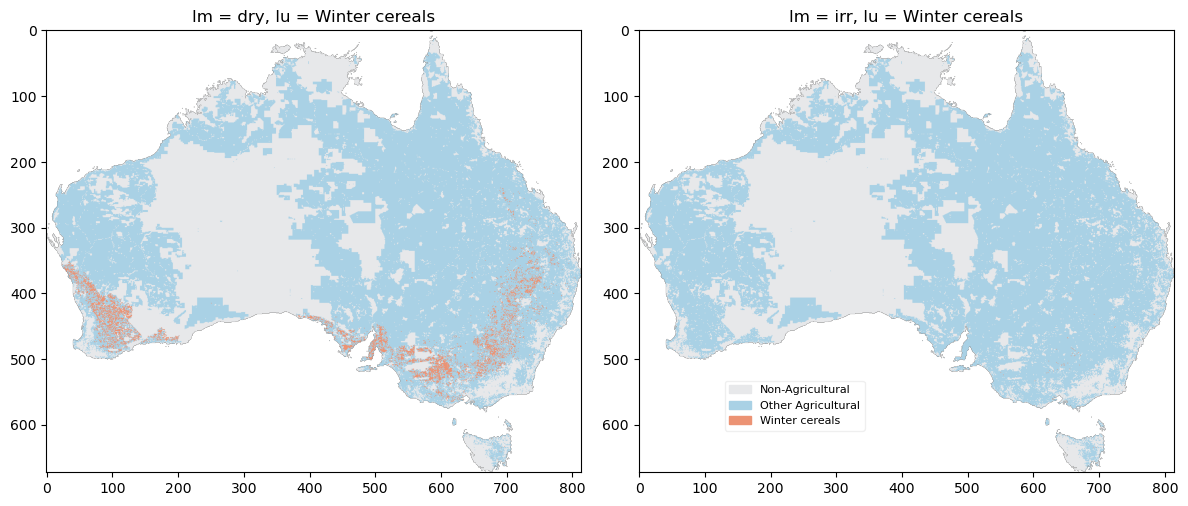

In [92]:
# Create a figure and a set of subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first map (dry) on the first axis
map_to_plot(lu_arr_dry, colors, cell_names, legend_params, ax=axs[0])
axs[0].set_title(f'lm = dry, lu = {lu_desc}')

# Plot the second map (irr) on the second axis
map_to_plot(lu_arr_irr, colors, cell_names, legend_params, ax=axs[1])
axs[1].set_title(f'lm = irr, lu = {lu_desc}')

# Optionally, adjust the layout
plt.tight_layout()

# Show the combined plots
plt.show()

## Agricultural commodity production

In [60]:
# Get the quantity matrices
q_mrj = get_quantity_matrices(data, year_idx).astype(np.float32)
q_mrj_xr = mrj_to_xr(data, q_mrj).drop_vars('spatial_ref')

# Select the quantity matrix for the given water supply and land-use
q_dry = q_mrj_xr.sel(lm='dry', lu=lu_desc.upper())
q_irr = q_mrj_xr.sel(lm='irr', lu=lu_desc.upper()) 

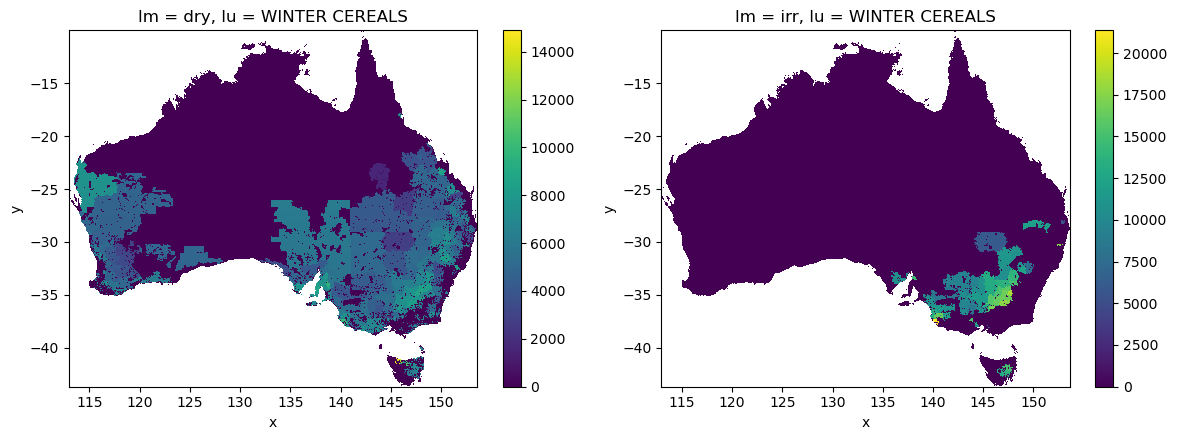

In [101]:
# Create a figure and a set of subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(12, 4.5))

# Plot the maps side by side
q_dry.plot(vmin=q_dry.min(), vmax=q_dry.max(), ax=axs[0], cmap='viridis')
q_irr.plot(vmin=q_irr.min(), vmax=q_irr.max(), ax=axs[1], cmap='viridis')

# Optionally, adjust the layout
plt.tight_layout()